In [46]:
import tensorflow as tf
import librosa
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import numpy as np
import glob
from matplotlib import pyplot as plt
import os
import time     # measuring elapsed time
import psutil   # measuring memory space

In [2]:
# define parameters for spectrogram computation
n_fft = 2048        # number of FFT points
hop_length = 512    # hop length for spectrogram computation
n_mels = 128        # number of Mel bands

In [3]:
def preprocess_audio(audio_path):
    # load audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    # compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    
    return spectrogram

In [4]:
# get current directory path
current_dir = os.getcwd()

# paths to all data folders
train_folder = os.path.join(current_dir, "train_data")
validation_folder = os.path.join(current_dir, "validation_data")
test_folder = os.path.join(current_dir, "test_data")

#print(train_folder)
#print(validation_folder)
#print(test_folder)

all_data = []

# 
# TRAIN DATA PREPROCESSING
# 

train_data = []
train_labels = []

for class_folder in glob.glob(os.path.join(train_folder, '*')):
    class_label = os.path.basename(class_folder)
    audio_paths = glob.glob(os.path.join(class_folder + "/*.wav"))
    
    for audio_path in audio_paths:
        spectrogram = preprocess_audio(audio_path)
        train_data.append(spectrogram)
        train_labels.append(class_label)

        all_data.append(spectrogram)


# 
# VALIDATION DATA PREPROCESSING
# 

val_data = []
val_labels = []

for class_folder in glob.glob(os.path.join(validation_folder, '*')):
    class_label = os.path.basename(class_folder)
    audio_paths = glob.glob(os.path.join(class_folder + "/*.wav"))
    
    for audio_path in audio_paths:
        spectrogram = preprocess_audio(audio_path)
        val_data.append(spectrogram)
        val_labels.append(class_label)

        all_data.append(spectrogram)



# 
# TEST DATA PREPROCESSING
# 

test_data = []
test_labels = []

for class_folder in glob.glob(os.path.join(test_folder, '*')):
    print(class_folder)
    class_label = os.path.basename(class_folder)
    #print(class_label)
    audio_paths = glob.glob(os.path.join(class_folder + "/*.wav"))
    #print(audio_paths)
    
    for audio_path in audio_paths:
        spectrogram = preprocess_audio(audio_path)
        test_data.append(spectrogram)
        test_labels.append(class_label)

        all_data.append(spectrogram)



print(train_data[0].shape)
print(test_data[0].shape)
print(val_data[6].shape)
print(val_data[3].shape)



def unify_spectrograms(data):
    max_height = 0
    max_width = 0
    for i in range(len(data)):
        if data[i].shape[0] > max_height:
            max_height = data[i].shape[0]
        if data[i].shape[1] > max_width:
            max_width = data[i].shape[1]
    
    unified_data = []
    for spectrogram in data:
        padded_spectrogram = np.pad(spectrogram, ((0, max_height - spectrogram.shape[0]), (0, max_width - spectrogram.shape[1])), mode='constant')
        unified_data.append(padded_spectrogram)
    
    return unified_data


print("all data samples:", len(all_data))

all_data_unified = unify_spectrograms(all_data)

train_data = all_data_unified[0:265]
val_data = all_data_unified[265:315]
test_data = all_data_unified[315:347]

print("\n", train_data[0].shape)
print(test_data[0].shape)
print(val_data[6].shape)
print(val_data[3].shape)


# conversion to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
val_data = np.array(val_data)
val_labels = np.array(val_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("train data num:", len(train_data))
print("validation data num:", len(val_data))
print("test data num:", len(test_data))


# save array of spectrograms to numpy array
np.save("train_spectrograms.npy", train_data)
np.save("train_labels.npy", train_labels)
np.save("validation_spectrograms.npy", val_data)
np.save("validation_labels.npy", val_labels)
np.save("test_spectrograms.npy", test_data)
np.save("test_labels.npy", test_labels)

g:\Other computers\Home Desktop\Google Drive\FERI\6. semester\Umetna Inteligenca\vaje\seminarska_naloga\test_data\0
g:\Other computers\Home Desktop\Google Drive\FERI\6. semester\Umetna Inteligenca\vaje\seminarska_naloga\test_data\1
g:\Other computers\Home Desktop\Google Drive\FERI\6. semester\Umetna Inteligenca\vaje\seminarska_naloga\test_data\2
g:\Other computers\Home Desktop\Google Drive\FERI\6. semester\Umetna Inteligenca\vaje\seminarska_naloga\test_data\3
g:\Other computers\Home Desktop\Google Drive\FERI\6. semester\Umetna Inteligenca\vaje\seminarska_naloga\test_data\4
(128, 277)
(128, 107)
(128, 107)
(128, 110)
all data samples: 347

 (128, 295)
(128, 295)
(128, 295)
(128, 295)
265
50
32


In [ ]:
# plot spectrograms
for i in range(len(train_data)):    
    plt.figure()
    plt.imshow(train_data[i], cmap='hot', origin="lower")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    if train_labels[i] == '0':
        plt.title("'open Instagram' command")
    elif train_labels[i] == '1':
        plt.title("'set my alarm' command")
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [52]:
# load preprocessed data
x_train = np.load('train_spectrograms.npy')
y_train = np.load('train_labels.npy')
x_val = np.load('validation_spectrograms.npy')
y_val = np.load('validation_labels.npy')
x_test = np.load('test_spectrograms.npy')
y_test = np.load('test_labels.npy')

print(x_train[0].shape)
print(x_val[0].shape)

print(len(x_train))


# string to int conversion
train_labels2 = []
for i in train_labels:
    train_labels2.append(int(i))


# reshape input data (from 3 to 4 dimensions)
x_train_data = np.expand_dims(x_train[0], axis = -1)
input_shape = x_train_data.shape
print(input_shape)

y_train = train_labels2
y_val = val_labels
y_test = test_labels


# normalizing input spectrograms
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
x_val = (x_val- np.mean(x_val)) / np.std(x_val)
x_test = (x_test - np.mean(x_test)) / np.std(x_test)


# conversion to one-hot values
num_classes = 5
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)


print(len(x_val))
print(len(y_val))

print(x_train[0].shape)
print(y_train[0].shape)

print(x_val[0].shape)
print(y_val[0].shape)

print(len(x_train))
print(len(y_train))


# CNN architecture
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.001))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.001))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.001))
model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

model.summary()


# get process memory 
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss



# start timer
start_time = time.time()

# memory usage before training
mem_before = process_memory()
print("memory before:", mem_before)


# compile & train model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_val, y_val))

# stop timer
end_time = time.time()

# memory usage after training
mem_after = process_memory()
print("memory after:", mem_after)



# evaluate model
loss, accuracy = model.evaluate(x_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


# calculate elapsed time
elapsed_time = end_time - start_time
print("Training time:", elapsed_time, "seconds")

# calculate memory usage
mem_used = (mem_after - mem_before) / (1024 * 1024)
print("Memory used:", mem_used, "MB")

(128, 295)
(128, 295)
265
(128, 295, 1)
50
50
(128, 295)
(5,)
(128, 295)
(5,)
265
265
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 126, 293, 16)      160       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 63, 146, 16)      0         
 g2D)                                                            
                                                                 
 dropout_51 (Dropout)        (None, 63, 146, 16)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 61, 144, 32)       4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 30, 72, 32)       0         
 g2D)                                                            
                                 

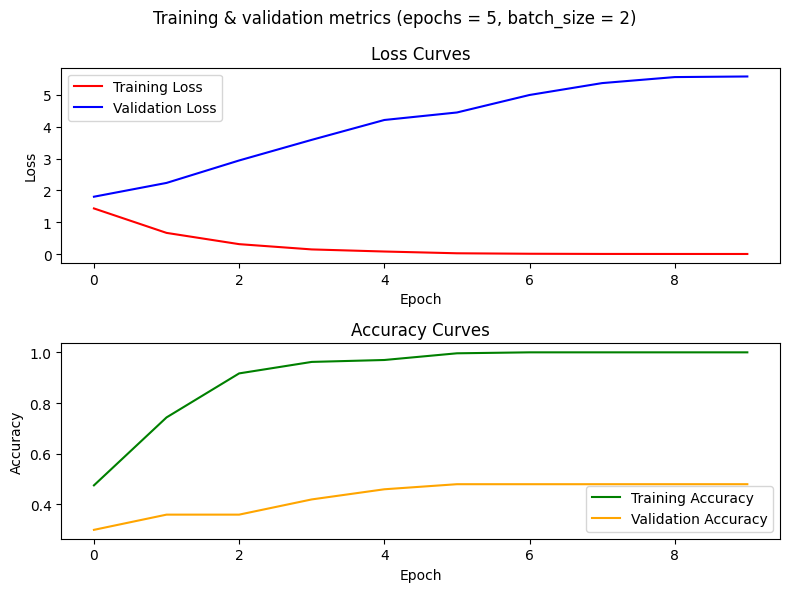

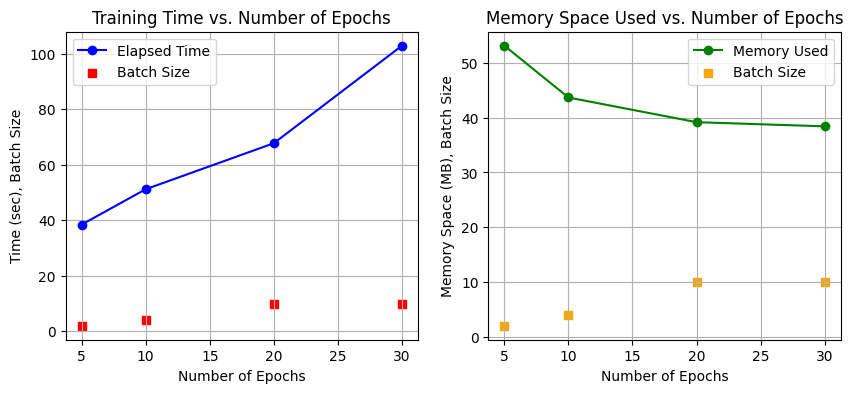

In [84]:
# plot result graphs

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# plot the loss curve
ax1.plot(history.history['loss'], color='red', label='Training Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.set_title('Loss Curves')
ax1.legend()

# plot the accuracy curve
ax2.plot(history.history['accuracy'], color='green', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_title('Accuracy Curves')
ax2.legend()

plt.suptitle("Training & validation metrics (epochs = 5, batch_size = 2)")


# adjust the spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

epochs = [5, 10, 20, 30]  # Number of epochs
elapsed_time = [38.44, 51.18, 67.75, 102.88]  # Elapsed training time in minutes
space_used = [53.16, 43.7, 39.19, 38.43]  # Elapsed training time in minutes
batch_size = [2, 4, 10, 10]  # Batch size

ax1.plot(epochs, elapsed_time, 'b-o', label='Elapsed Time')
ax1.scatter(epochs, batch_size, color='red', marker='s', label='Batch Size')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Time (sec), Batch Size')
ax1.set_title('Training Time vs. Number of Epochs')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, space_used, 'g-o', label='Memory Used')
ax2.scatter(epochs, batch_size, color='orange', marker='s', label='Batch Size')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Memory Space (MB), Batch Size')
ax2.set_title('Memory Space Used vs. Number of Epochs')
ax2.legend()
ax2.grid(True)

plt.show()